In [5]:
from pyecharts import options as opts
from pyecharts.charts import Map, Funnel
import pandas as pd
import numpy as np
import pandas as pd

# Create the dataset
data = {
    'MONTH': [
        '2023-01-01', '2023-01-01',
        '2023-02-01', '2023-02-01',
        '2023-03-01', '2023-03-01',
        '2023-04-01', '2023-04-01',
        '2023-05-01', '2023-05-01'
    ],
    'CLASS': [
        'Business', 'Personal',
        'Business', 'Personal',
        'Business', 'Personal',
        'Business', 'Personal',
        'Personal', 'Business'
    ],
    'COUNT_PROFILE': [
        8610, 55788,
        8977, 49466,
        10494, 56754,
        9057, 52687,
        54406, 10266
    ]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Convert MONTH column to datetime format
df['MONTH'] = pd.to_datetime(df['MONTH'])

# Sort by MONTH and CLASS to ensure consistent ordering
df = df.sort_values(by=['MONTH', 'CLASS']).reset_index(drop=True)

# Print the original dataset
print("Original Dataset:")
print(df)

# Group by MONTH to calculate the total profiles onboarded (Business + Personal)
df_total = df.groupby('MONTH')['COUNT_PROFILE'].sum().reset_index()
df_total.columns = ['MONTH', 'TOTAL_COUNT']

df.head(11)
df_total.head(11)

Original Dataset:
       MONTH     CLASS  COUNT_PROFILE
0 2023-01-01  Business           8610
1 2023-01-01  Personal          55788
2 2023-02-01  Business           8977
3 2023-02-01  Personal          49466
4 2023-03-01  Business          10494
5 2023-03-01  Personal          56754
6 2023-04-01  Business           9057
7 2023-04-01  Personal          52687
8 2023-05-01  Business          10266
9 2023-05-01  Personal          54406


,MONTH,TOTAL_COUNT
0,2023-01-01,64398
1,2023-02-01,58443
2,2023-03-01,67248
3,2023-04-01,61744
4,2023-05-01,64672


Historical Data (Personal and Business Separated):
CLASS      MONTH  Business  Personal
0     2023-01-01      8610     55788
1     2023-02-01      8977     49466
2     2023-03-01     10494     56754
3     2023-04-01      9057     52687
4     2023-05-01     10266     54406

Holt Model Parameters for Personal:
Smoothing Level (alpha): 0.7427
Smoothing Trend (beta): 0.7427

Holt Model Parameters for Business:
Smoothing Level (alpha): 0.0123
Smoothing Trend (beta): 0.0111

Forecasted Values for Personal, Business, and Total (Next 12 Months):
            Personal_Forecast  Business_Forecast  Total_Forecast
MONTH                                                           
2023-06-01       54579.879615       10389.206851    64969.086466
2023-07-01       55031.008260       10692.236039    65723.244299
2023-08-01       55482.136904       10995.265228    66477.402132
2023-09-01       55933.265549       11298.294416    67231.559965
2023-10-01       56384.394194       11601.323604    67985.717798
2

/opt/miniconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/miniconda3/lib/python3.12/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/opt/miniconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


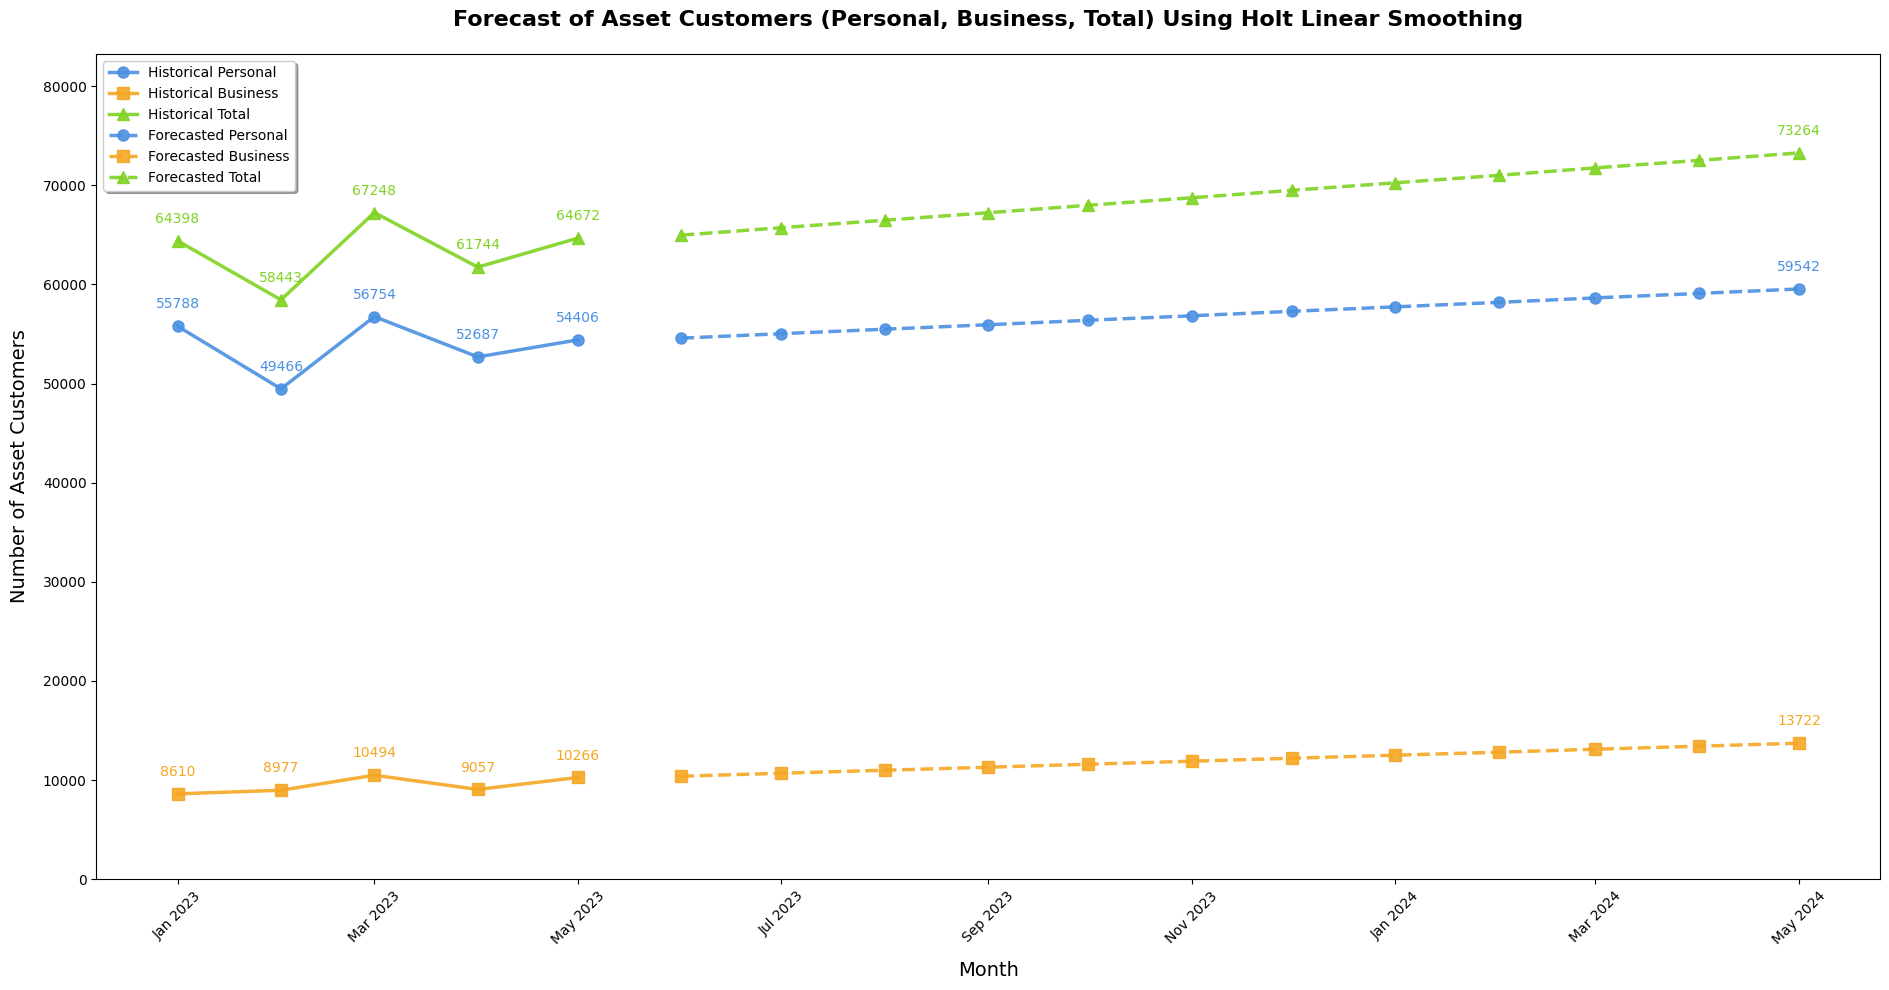

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import Holt
from matplotlib.dates import DateFormatter

# Create the dataset
data = {
    'MONTH': [
        '2023-01-01', '2023-01-01',
        '2023-02-01', '2023-02-01',
        '2023-03-01', '2023-03-01',
        '2023-04-01', '2023-04-01',
        '2023-05-01', '2023-05-01'
    ],
    'CLASS': [
        'Business', 'Personal',
        'Business', 'Personal',
        'Business', 'Personal',
        'Business', 'Personal',
        'Personal', 'Business'
    ],
    'COUNT_PROFILE': [
        8610, 55788,
        8977, 49466,
        10494, 56754,
        9057, 52687,
        54406, 10266
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Convert MONTH column to datetime format
df['MONTH'] = pd.to_datetime(df['MONTH'])

# Sort by MONTH and CLASS
df = df.sort_values(by=['MONTH', 'CLASS']).reset_index(drop=True)

# Pivot the data to separate Business and Personal
df_pivot = df.pivot(index='MONTH', columns='CLASS', values='COUNT_PROFILE').reset_index()

# Print the pivoted data
print("Historical Data (Personal and Business Separated):")
print(df_pivot)

# Set MONTH as index for time series analysis
df_pivot.set_index('MONTH', inplace=True)

# --- Forecast for Personal ---
# Apply Holt Linear Exponential Smoothing to Personal
holt_personal = Holt(df_pivot['Personal'], initialization_method="estimated")
fit_personal = holt_personal.fit(optimized=True)

# Print Personal model parameters
print("\nHolt Model Parameters for Personal:")
print(f"Smoothing Level (alpha): {fit_personal.params['smoothing_level']:.4f}")
print(f"Smoothing Trend (beta): {fit_personal.params['smoothing_trend']:.4f}")

# Forecast 12 months for Personal
forecast_periods = 12
forecast_personal = fit_personal.forecast(steps=forecast_periods)

# --- Forecast for Business ---
# Apply Holt Linear Exponential Smoothing to Business
holt_business = Holt(df_pivot['Business'], initialization_method="estimated")
fit_business = holt_business.fit(optimized=True)

# Print Business model parameters
print("\nHolt Model Parameters for Business:")
print(f"Smoothing Level (alpha): {fit_business.params['smoothing_level']:.4f}")
print(f"Smoothing Trend (beta): {fit_business.params['smoothing_trend']:.4f}")

# Forecast 12 months for Business
forecast_business = fit_business.forecast(steps=forecast_periods)

# Create date range for the forecast (June 2023 to May 2024)
forecast_dates = pd.date_range(start='2023-06-01', periods=forecast_periods, freq='MS')

# Create DataFrame for forecast results
forecast_df = pd.DataFrame({
    'MONTH': forecast_dates,
    'Personal_Forecast': forecast_personal.values,
    'Business_Forecast': forecast_business.values
})

# Calculate the total forecast
forecast_df['Total_Forecast'] = forecast_df['Personal_Forecast'] + forecast_df['Business_Forecast']

# Set MONTH as index
forecast_df.set_index('MONTH', inplace=True)

# Print forecast results
print("\nForecasted Values for Personal, Business, and Total (Next 12 Months):")
print(forecast_df)

# Combine historical and forecasted data for visualization
historical_df = df_pivot[['Personal', 'Business']].copy()
historical_df['Total'] = historical_df['Personal'] + historical_df['Business']

# --- Visualization ---
plt.figure(figsize=(19, 10), dpi=100)

# Colors inspired by the PPT template
colors = {
    'Personal': '#4A90E2',  # Light Blue (similar to "First Action")
    'Business': '#F5A623',  # Orange-Yellow (similar to "First Asset")
    'Total': '#7ED321'      # Green (similar to "First Top Up")
}

# Plot historical data
plt.plot(historical_df.index, historical_df['Personal'], marker='o', linewidth=2.5, markersize=8, 
         label='Historical Personal', color=colors['Personal'], alpha=0.9)
plt.plot(historical_df.index, historical_df['Business'], marker='s', linewidth=2.5, markersize=8, 
         label='Historical Business', color=colors['Business'], alpha=0.9)
plt.plot(historical_df.index, historical_df['Total'], marker='^', linewidth=2.5, markersize=8, 
         label='Historical Total', color=colors['Total'], alpha=0.9)

# Plot forecasted data
plt.plot(forecast_df.index, forecast_df['Personal_Forecast'], marker='o', linewidth=2.5, markersize=8, 
         label='Forecasted Personal', color=colors['Personal'], linestyle='--', alpha=0.9)
plt.plot(forecast_df.index, forecast_df['Business_Forecast'], marker='s', linewidth=2.5, markersize=8, 
         label='Forecasted Business', color=colors['Business'], linestyle='--', alpha=0.9)
plt.plot(forecast_df.index, forecast_df['Total_Forecast'], marker='^', linewidth=2.5, markersize=8, 
         label='Forecasted Total', color=colors['Total'], linestyle='--', alpha=0.9)

# Add value labels on historical data points
for i, (personal, business, total) in enumerate(zip(historical_df['Personal'], historical_df['Business'], historical_df['Total'])):
    plt.text(historical_df.index[i], personal + 1500, f'{int(personal)}', ha='center', va='bottom', fontsize=10, color=colors['Personal'])
    plt.text(historical_df.index[i], business + 1500, f'{int(business)}', ha='center', va='bottom', fontsize=10, color=colors['Business'])
    plt.text(historical_df.index[i], total + 1500, f'{int(total)}', ha='center', va='bottom', fontsize=10, color=colors['Total'])

# Add value labels on forecasted data points (only for the last point to avoid clutter)
plt.text(forecast_df.index[-1], forecast_df['Personal_Forecast'].iloc[-1] + 1500, f'{int(forecast_df["Personal_Forecast"].iloc[-1])}', 
         ha='center', va='bottom', fontsize=10, color=colors['Personal'])
plt.text(forecast_df.index[-1], forecast_df['Business_Forecast'].iloc[-1] + 1500, f'{int(forecast_df["Business_Forecast"].iloc[-1])}', 
         ha='center', va='bottom', fontsize=10, color=colors['Business'])
plt.text(forecast_df.index[-1], forecast_df['Total_Forecast'].iloc[-1] + 1500, f'{int(forecast_df["Total_Forecast"].iloc[-1])}', 
         ha='center', va='bottom', fontsize=10, color=colors['Total'])

# Set title and labels
plt.title('Forecast of Asset Customers (Personal, Business, Total) Using Holt Linear Smoothing', fontsize=16, pad=20, fontweight='bold')
plt.xlabel('Month', fontsize=14, labelpad=10)
plt.ylabel('Number of Asset Customers', fontsize=14, labelpad=10)

# Format x-axis dates
plt.gca().xaxis.set_major_formatter(DateFormatter('%b %Y'))
plt.xticks(rotation=45)

# Set y-axis range to accommodate labels
plt.ylim(0, max(historical_df['Total'].max(), forecast_df['Total_Forecast'].max()) + 10000)

# Add legend
plt.legend(loc='upper left', fontsize=10, frameon=True, shadow=True)

# Remove gridlines (as per PPT style)
plt.grid(False)

# Set background to white
plt.gca().set_facecolor('white')
plt.gcf().set_facecolor('white')

# Adjust layout to prevent label clipping
plt.tight_layout()

# Show the plot
plt.show()

Historical Data (Personal and Business Separated):
CLASS      MONTH  Business  Personal
0     2023-01-01      8610     55788
1     2023-02-01      8977     49466
2     2023-03-01     10494     56754
3     2023-04-01      9057     52687
4     2023-05-01     10266     54406

Holt Model Parameters for Personal:
Smoothing Level (alpha): 0.7427
Smoothing Trend (beta): 0.7427

Holt Model Parameters for Business:
Smoothing Level (alpha): 0.0123
Smoothing Trend (beta): 0.0111

Forecasted Values for Personal, Business, and Total (Next 12 Months):
            Personal_Forecast  Business_Forecast  Total_Forecast
MONTH                                                           
2023-06-01       54784.782013       10797.725936    65582.507949
2023-07-01       55338.292785       11164.572220    66502.865005
2023-08-01       55891.803557       11531.418504    67423.222061
2023-09-01       56445.314329       11898.264788    68343.579117
2023-10-01       56998.825101       12265.111072    69263.936174
2

/opt/miniconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/miniconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


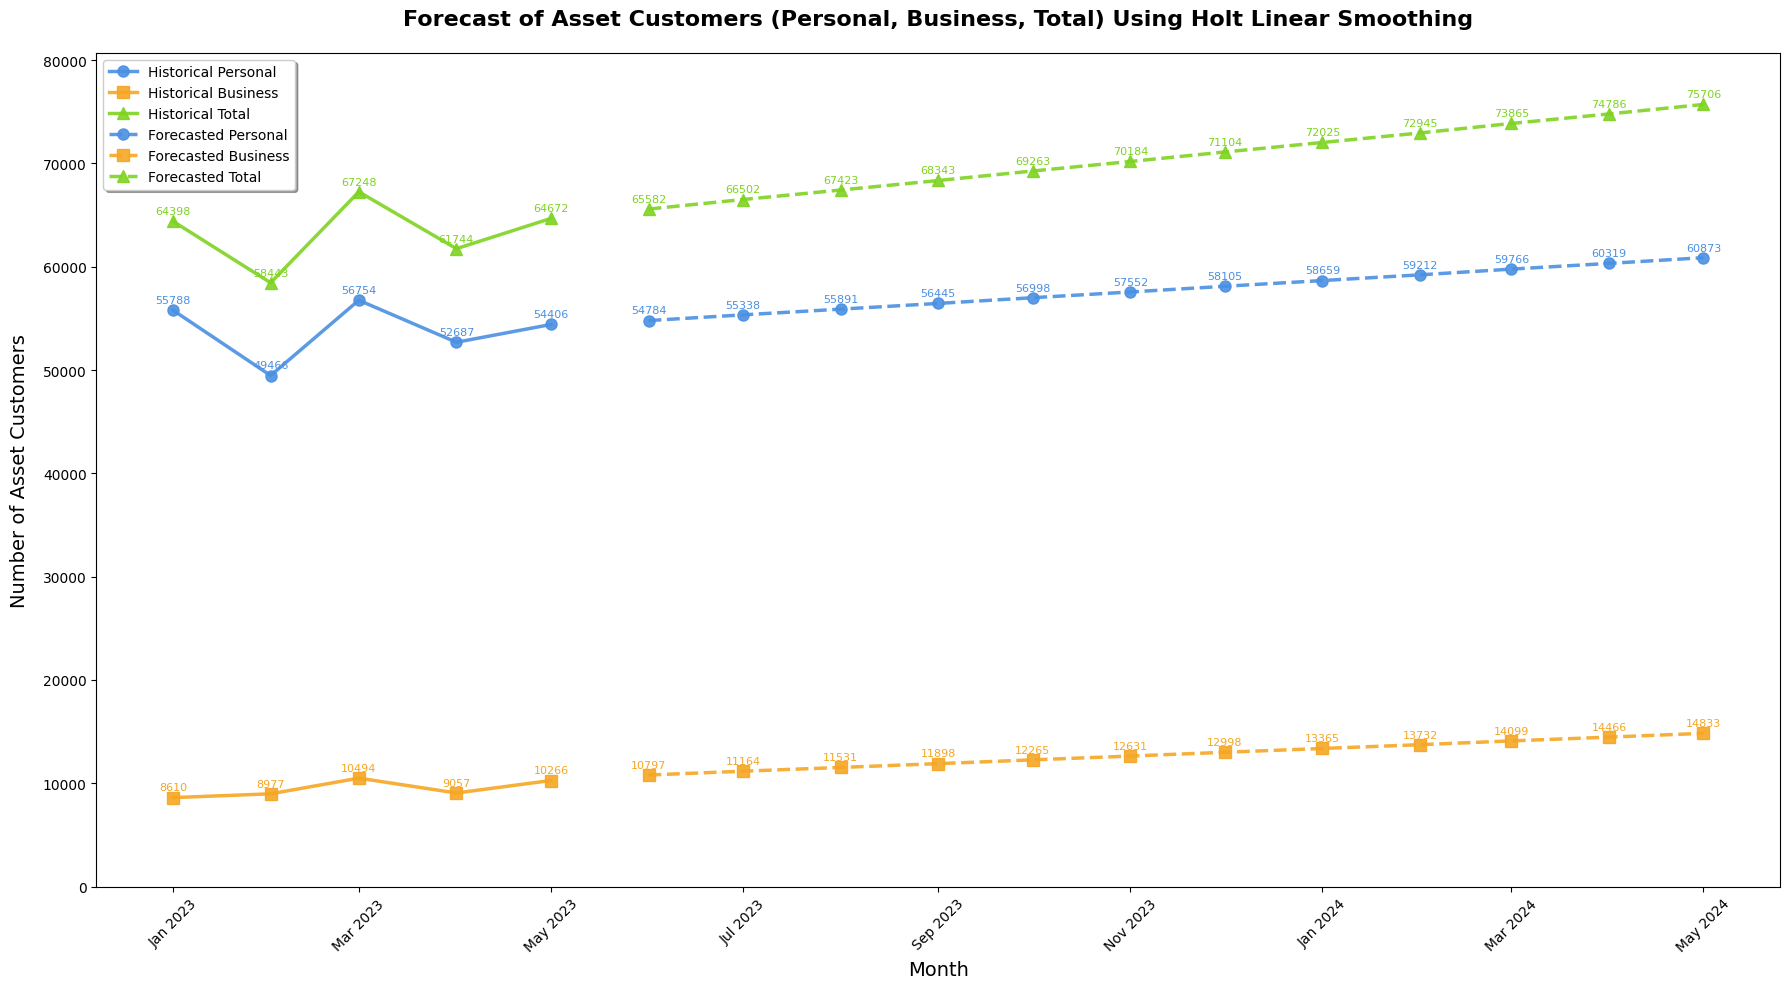

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import Holt
from matplotlib.dates import DateFormatter

# Create the dataset
data = {
    'MONTH': [
        '2023-01-01', '2023-01-01',
        '2023-02-01', '2023-02-01',
        '2023-03-01', '2023-03-01',
        '2023-04-01', '2023-04-01',
        '2023-05-01', '2023-05-01'
    ],
    'CLASS': [
        'Business', 'Personal',
        'Business', 'Personal',
        'Business', 'Personal',
        'Business', 'Personal',
        'Personal', 'Business'
    ],
    'COUNT_PROFILE': [
        8610, 55788,
        8977, 49466,
        10494, 56754,
        9057, 52687,
        54406, 10266
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Convert MONTH column to datetime format
df['MONTH'] = pd.to_datetime(df['MONTH'])

# Sort by MONTH and CLASS
df = df.sort_values(by=['MONTH', 'CLASS']).reset_index(drop=True)

# Pivot the data to separate Business and Personal
df_pivot = df.pivot(index='MONTH', columns='CLASS', values='COUNT_PROFILE').reset_index()

# Print the pivoted data
print("Historical Data (Personal and Business Separated):")
print(df_pivot)

# Set MONTH as index for time series analysis
df_pivot.set_index('MONTH', inplace=True)

# --- Forecast for Personal ---
# Apply Holt Linear Exponential Smoothing to Personal with specified parameters
holt_personal = Holt(df_pivot['Personal'], initialization_method="estimated")
fit_personal = holt_personal.fit(smoothing_level=0.7427, smoothing_trend=0.7427, optimized=False)

# Print Personal model parameters
print("\nHolt Model Parameters for Personal:")
print(f"Smoothing Level (alpha): {fit_personal.params['smoothing_level']:.4f}")
print(f"Smoothing Trend (beta): {fit_personal.params['smoothing_trend']:.4f}")

# Forecast 12 months for Personal
forecast_periods = 12
forecast_personal = fit_personal.forecast(steps=forecast_periods)

# --- Forecast for Business ---
# Apply Holt Linear Exponential Smoothing to Business with specified parameters
holt_business = Holt(df_pivot['Business'], initialization_method="estimated")
fit_business = holt_business.fit(smoothing_level=0.0123, smoothing_trend=0.0111, optimized=False)

# Print Business model parameters
print("\nHolt Model Parameters for Business:")
print(f"Smoothing Level (alpha): {fit_business.params['smoothing_level']:.4f}")
print(f"Smoothing Trend (beta): {fit_business.params['smoothing_trend']:.4f}")

# Forecast 12 months for Business
forecast_business = fit_business.forecast(steps=forecast_periods)

# Create date range for the forecast (June 2023 to May 2024)
forecast_dates = pd.date_range(start='2023-06-01', periods=forecast_periods, freq='MS')

# Create DataFrame for forecast results
forecast_df = pd.DataFrame({
    'MONTH': forecast_dates,
    'Personal_Forecast': forecast_personal.values,
    'Business_Forecast': forecast_business.values
})

# Calculate the total forecast
forecast_df['Total_Forecast'] = forecast_df['Personal_Forecast'] + forecast_df['Business_Forecast']

# Set MONTH as index
forecast_df.set_index('MONTH', inplace=True)

# Print forecast results
print("\nForecasted Values for Personal, Business, and Total (Next 12 Months):")
print(forecast_df)

# Combine historical and forecasted data for visualization
historical_df = df_pivot[['Personal', 'Business']].copy()
historical_df['Total'] = historical_df['Personal'] + historical_df['Business']

# --- Visualization ---
plt.figure(figsize=(18, 10), dpi=100)

# Colors inspired by the PPT template
colors = {
    'Personal': '#4A90E2',  # Light Blue (similar to "First Action")
    'Business': '#F5A623',  # Orange-Yellow (similar to "First Asset")
    'Total': '#7ED321'      # Green (similar to "First Top Up")
}

# Plot historical data
plt.plot(historical_df.index, historical_df['Personal'], marker='o', linewidth=2.5, markersize=8, 
         label='Historical Personal', color=colors['Personal'], alpha=0.9)
plt.plot(historical_df.index, historical_df['Business'], marker='s', linewidth=2.5, markersize=8, 
         label='Historical Business', color=colors['Business'], alpha=0.9)
plt.plot(historical_df.index, historical_df['Total'], marker='^', linewidth=2.5, markersize=8, 
         label='Historical Total', color=colors['Total'], alpha=0.9)

# Plot forecasted data
plt.plot(forecast_df.index, forecast_df['Personal_Forecast'], marker='o', linewidth=2.5, markersize=8, 
         label='Forecasted Personal', color=colors['Personal'], linestyle='--', alpha=0.9)
plt.plot(forecast_df.index, forecast_df['Business_Forecast'], marker='s', linewidth=2.5, markersize=8, 
         label='Forecasted Business', color=colors['Business'], linestyle='--', alpha=0.9)
plt.plot(forecast_df.index, forecast_df['Total_Forecast'], marker='^', linewidth=2.5, markersize=8, 
         label='Forecasted Total', color=colors['Total'], linestyle='--', alpha=0.9)

# Add value labels on historical data points (smaller font, closer to points)
for i, (personal, business, total) in enumerate(zip(historical_df['Personal'], historical_df['Business'], historical_df['Total'])):
    plt.text(historical_df.index[i], personal + 500, f'{int(personal)}', ha='center', va='bottom', fontsize=8, color=colors['Personal'])
    plt.text(historical_df.index[i], business + 500, f'{int(business)}', ha='center', va='bottom', fontsize=8, color=colors['Business'])
    plt.text(historical_df.index[i], total + 500, f'{int(total)}', ha='center', va='bottom', fontsize=8, color=colors['Total'])

# Add value labels on all forecasted data points (smaller font, closer to points)
for i, (personal, business, total) in enumerate(zip(forecast_df['Personal_Forecast'], forecast_df['Business_Forecast'], forecast_df['Total_Forecast'])):
    plt.text(forecast_df.index[i], personal + 500, f'{int(personal)}', ha='center', va='bottom', fontsize=8, color=colors['Personal'])
    plt.text(forecast_df.index[i], business + 500, f'{int(business)}', ha='center', va='bottom', fontsize=8, color=colors['Business'])
    plt.text(forecast_df.index[i], total + 500, f'{int(total)}', ha='center', va='bottom', fontsize=8, color=colors['Total'])

# Set title and labels
plt.title('Forecast of Asset Customers (Personal, Business, Total) Using Holt Linear Smoothing', fontsize=16, pad=20, fontweight='bold')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Asset Customers', fontsize=14, labelpad=10)

# Format x-axis dates
plt.gca().xaxis.set_major_formatter(DateFormatter('%b %Y'))
plt.xticks(rotation=45)

# Set y-axis range to accommodate labels
plt.ylim(0, max(historical_df['Total'].max(), forecast_df['Total_Forecast'].max()) + 5000)

# Add legend
plt.legend(loc='upper left', fontsize=10, frameon=True, shadow=True)

# Remove gridlines (as per PPT style)
plt.grid(False)

# Set background to white
plt.gca().set_facecolor('white')
plt.gcf().set_facecolor('white')

# Adjust layout to prevent label clipping
plt.tight_layout()

# Show the plot
plt.show()